In [1]:
#### This program predicts stock prices by using Linear Regression models

#Install the dependencies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

# Set the start and end date
start_date = '1990-01-01'
end_date = '2019-02-01'


In [2]:
# #Get the stock data

df=pd.read_csv("Amzn_stock.csv") 

# Take a look at the data
print(df.head())


         Date   Open   High    Low  Close     Volume  Ex-Dividend  \
0  1997-05-16  22.38  23.75  20.50  20.75  1225000.0          0.0   
1  1997-05-19  20.50  21.25  19.50  20.50   508900.0          0.0   
2  1997-05-20  20.75  21.00  19.63  19.63   455600.0          0.0   
3  1997-05-21  19.25  19.75  16.50  17.13  1571100.0          0.0   
4  1997-05-22  17.25  17.38  15.75  16.75   981400.0          0.0   

   Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
0          1.0   1.865000   1.979167  1.708333    1.729167   14700000.0  
1          1.0   1.708333   1.770833  1.625000    1.708333    6106800.0  
2          1.0   1.729167   1.750000  1.635833    1.635833    5467200.0  
3          1.0   1.604167   1.645833  1.375000    1.427500   18853200.0  
4          1.0   1.437500   1.448333  1.312500    1.395833   11776800.0  


In [3]:
# # Get the Adjusted Close Price
df = df[['Adj. Close']]
#Take a look at the new data
print(df.head())


   Adj. Close
0    1.729167
1    1.708333
2    1.635833
3    1.427500
4    1.395833


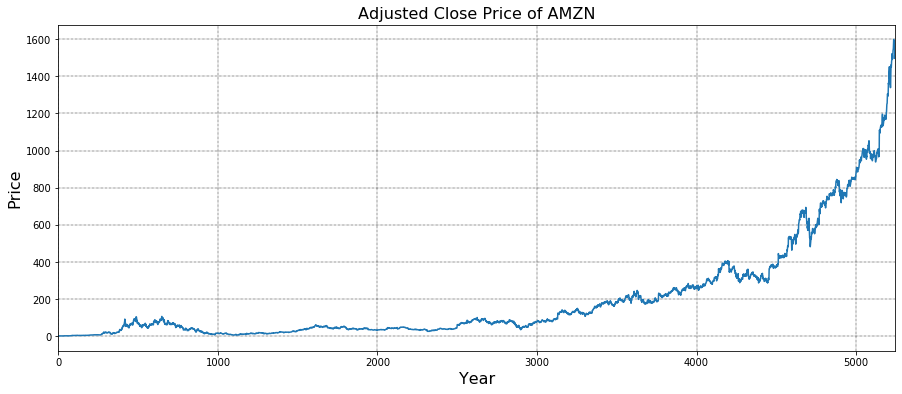

In [4]:
# Define the figure size for the plot
ticker = 'AMZN'
plt.figure(figsize=(15, 6))
# Plot the adjusted close price
df['Adj. Close'].plot()
# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=16)
plt.xlabel('Year', fontsize=16)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.4)
plt.show()

In [5]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #forecast_out = 'n=30' days
#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)
#print the new data set
print(df.tail())

      Adj. Close  Prediction
5243     1581.86         NaN
5244     1544.10         NaN
5245     1495.56         NaN
5246     1555.86         NaN
5247     1497.05         NaN


In [6]:
##### Create the independent data set (X) thats the train data  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

In [7]:
###### Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[   1.72916667]
 [   1.70833333]
 [   1.63583333]
 ...
 [1350.47      ]
 [1338.99      ]
 [1386.23      ]]


In [8]:
##### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)

[1.54166667e+00 1.51583333e+00 1.58833333e+00 ... 1.49556000e+03
 1.55586000e+03 1.49705000e+03]


In [9]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.987817398404932


In [12]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[1414.51]
 [1451.05]
 [1461.76]
 [1448.69]
 [1468.35]
 [1482.92]
 [1484.76]
 [1500.  ]
 [1521.95]
 [1511.98]
 [1512.45]
 [1493.45]
 [1500.25]
 [1523.61]
 [1537.64]
 [1545.  ]
 [1551.86]
 [1578.89]
 [1598.39]
 [1588.18]
 [1591.  ]
 [1582.32]
 [1571.68]
 [1544.93]
 [1586.51]
 [1581.86]
 [1544.1 ]
 [1495.56]
 [1555.86]
 [1497.05]]


In [13]:

# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[1500.0704587  1538.90727126 1550.29047494 1536.39892759 1557.29470578
 1572.78053936 1574.73619713 1590.93414522 1614.26386705 1603.66717791
 1604.16672093 1583.97242869 1591.1998596  1616.02821048 1630.94010102
 1638.76273212 1646.05393447 1674.78297233 1695.50869332 1684.65691838
 1687.65417649 1678.42857351 1667.11976986 1638.68833209 1682.88194638
 1677.93965907 1637.80616038 1586.21505798 1650.30536442 1587.79871564]


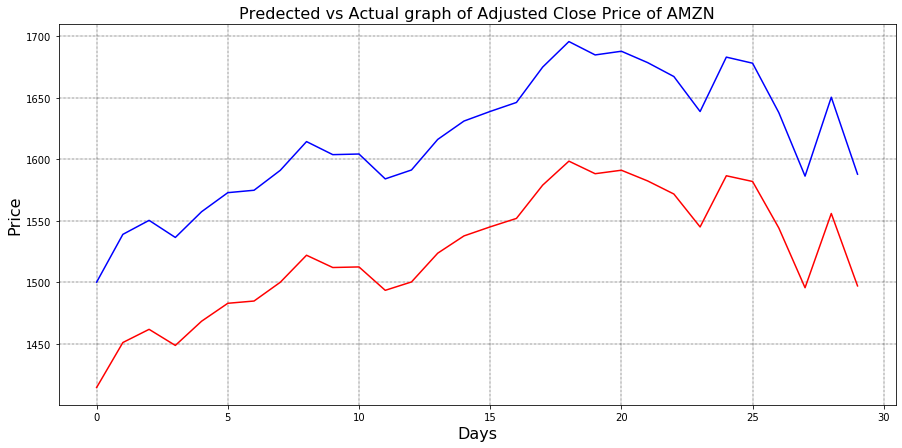

In [14]:
plt.figure(figsize=(15, 7))
plt.plot(lr_prediction,'b-',label='label here')

plt.title("Predected vs Actual graph of Adjusted Close Price of %s" % ticker, fontsize=16)
plt.plot(x_forecast,'r-' ,label='label here' )
plt.ylabel('Price', fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.4)

plt.show()